# Introduction to data munging with Jupyter and pandas
## Open Source Bridge 2015

In [1]:
from __future__ import division

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import rpy2

from IPython.display import display, Image, YouTubeVideo

%matplotlib inline

## The case for open source data tools

- [Reproducibility and Transparency](http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261)

- Cost -- compare capabilities between software you already use and open source [here](https://en.wikipedia.org/wiki/Comparison_of_statistical_packages)

- Learn more about open science at [Amy Boyle](https://twitter.com/amylouboyle)'s talk [Thursday afternoon](http://opensourcebridge.org/sessions/1535)!

## IPython/Jupyter Notebook: some cool tips for beginners

### 1. holy moly tab completion

In [3]:
pd.read_csv('

<function pandas.io.parsers.read_csv>

### 2. built-in documentation

In [12]:
?pd.read_csv

### 2. markup!

# Markdown and HTML
<img src='ipynb.gif' align='left'></span>
<br>
<br>
<br>

# LaTeX
<span style="font-size: 24px"> $\bar{x} = \frac{\sum_{i=1}^{n}w_i\cdot x_i}{\sum_{i=1}^{n}w_i}$</span>


# Syntax highlighting for other languages
```R
x <- c(0:10, 50)
xm <- mean(x)
c(xm, mean(x, trim = 0.10))
```

### 3. [magic methods](https://ipython.org/ipython-doc/dev/interactive/magics.html)

In [14]:
%quickref

In [15]:
%load_ext rmagic

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [17]:
%R x <- c(0:10, 50)
%R xm <- mean(x)
%R c(xm, mean(x, trim = 0.10))

array([ 8.75,  5.5 ])

### 4. [multimedia](https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html)

In [8]:
YouTubeVideo("L4Hbv4ugUWk")

### 5. Notebooks are now viewable directly [on github](https://github.com/meli-lewis/osb2015/blob/master/OSB2015_intro_data.ipynb), and also exportable as PDF or HTML.

# pandas

## Input
Source: [IRS.gov](http://www.irs.gov/uac/SOI-Tax-Stats-Individual-Income-Tax-Statistics-ZIP-Code-Data-%28SOI%29)

In [22]:
?pd.read_csv()

In [18]:
# read in a CSV
# specify that zipcode should be treated as a string rather than an int!
AGI = pd.read_csv('12zpallagi.csv',dtype={'zipcode': str})

In [19]:
AGI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166904 entries, 0 to 166903
Data columns (total 77 columns):
STATEFIPS    166904 non-null int64
STATE        166904 non-null object
zipcode      166904 non-null object
AGI_STUB     166904 non-null int64
N1           166904 non-null float64
MARS1        166904 non-null float64
MARS2        166904 non-null float64
MARS4        166904 non-null float64
PREP         166904 non-null float64
N2           166904 non-null float64
NUMDEP       166904 non-null float64
A00100       166904 non-null float64
N00200       166904 non-null float64
A00200       166904 non-null float64
N00300       166904 non-null float64
A00300       166904 non-null float64
N00600       166904 non-null float64
A00600       166904 non-null float64
N00650       166904 non-null float64
A00650       166904 non-null float64
N00900       166904 non-null float64
A00900       166904 non-null float64
SCHF         166904 non-null float64
N01000       166904 non-null float64
A01000 

# Transformation

In [20]:
# you can select columns by label or position!
AGI_column_subset = AGI[['STATE','AGI_STUB','zipcode','N1','A00100']]

In [21]:
AGI_column_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166904 entries, 0 to 166903
Data columns (total 5 columns):
STATE       166904 non-null object
AGI_STUB    166904 non-null int64
zipcode     166904 non-null object
N1          166904 non-null float64
A00100      166904 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.6+ MB


In [31]:
# note this is inclusive!
AGI_row_subset = AGI.ix[6:11]

In [32]:
AGI_row_subset

,STATEFIPS,STATE,zipcode,AGI_STUB,N1,MARS1,MARS2,MARS4,PREP,N2,...,N09600,A09600,N06500,A06500,N10300,A10300,N11901,A11901,N11902,A11902
6,1,AL,35004,1,1600,990,270,300,840,2390,...,0,0,570,397,760,667,130,107,1370,2855
7,1,AL,35004,2,1310,570,400,290,680,2620,...,0,0,1030,2595,1060,2752,150,186,1140,2965
8,1,AL,35004,3,900,280,500,100,460,2090,...,0,0,860,4382,870,4604,170,278,710,1982
9,1,AL,35004,4,590,70,490,30,270,1590,...,0,0,580,4605,580,4774,120,300,460,1460
10,1,AL,35004,5,480,30,440,0,250,1340,...,0,0,480,7397,480,7623,150,582,340,1330
11,1,AL,35004,6,50,0,50,0,50,140,...,30,70,50,4956,50,5125,30,585,0,0


In [34]:
AGI_column_subset.rename(columns={'N1':'population','A00100':'amount'},inplace=True)

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:2417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [35]:
AGI_column_subset

,STATE,AGI_STUB,zipcode,population,amount
0,AL,1,00000,889920,11517112
1,AL,2,00000,491150,17617800
2,AL,3,00000,254280,15644666
3,AL,4,00000,160160,13885434
4,AL,5,00000,183320,24641055
5,AL,6,00000,44840,21926706
6,AL,1,35004,1600,20639
7,AL,2,35004,1310,48501
8,AL,3,35004,900,55790
9,AL,4,35004,590,50978


In [63]:
# group by zipcode and sum other values, resetting index
AGI_grouped = AGI_column_subset.groupby('zipcode').sum().reset_index()

In [64]:
AGI_grouped.head()

,zipcode,AGI_STUB,population,amount
0,00000,1071,142098490,9123982917
1,01001,21,8780,458716
2,01002,21,9460,732849
3,01005,21,2230,122744
4,01007,21,7320,467891


## A WILD ZIP CODE APPEARS!

<img src="http://ecdn.funzypics.com/grumpycatmemes/pics/16/OH-No--The-Cute-Kitty-Cats-Are-Attacking-Like-Aliens----The-Hunt-Is-On-Wow-Quest-Guide-.jpg" align="left">

### Delete or render null? You decide!

In [65]:
AGI_grouped['population'].mean()

10254.987012987012

In [66]:
#this can also be done using the na_values param upon being read in
null_zips = AGI_grouped['zipcode'] == '00000'
AGI_grouped.loc[null_zips, 'zipcode'] = np.nan

In [67]:
AGI_grouped.head()

,zipcode,AGI_STUB,population,amount
0,NaN,1071,142098490,9123982917
1,01001,21,8780,458716
2,01002,21,9460,732849
3,01005,21,2230,122744
4,01007,21,7320,467891


In [68]:
AGI_notnull = AGI_grouped.dropna()

In [69]:
AGI_notnull['population'].mean()

5128.9638875861319

In [70]:
AGI_grouped.dropna(inplace=True)

In [73]:
# make a new column with the real amount, not in thousands
AGI_grouped['actual_amount'] = AGI_grouped['amount'] * 1000

In [74]:
# make a mean!
AGI_grouped['weighted_mean_AGI'] = AGI_grouped['actual_amount']/AGI_grouped['population']

In [75]:
#use anonymous functions to change every value in a column!
AGI_grouped['weighted_mean_AGI']= AGI_grouped['weighted_mean_AGI'].apply(lambda x: round(x, 0))

In [77]:
AGI_grouped.head()

,zipcode,AGI_STUB,population,amount,actual_amount,weighted_mean_AGI
1,01001,21,8780,458716,458716000,52246
2,01002,21,9460,732849,732849000,77468
3,01005,21,2230,122744,122744000,55042
4,01007,21,7320,467891,467891000,63920
5,01008,21,640,38487,38487000,60136


In [79]:
# drop columns you won't need
AGI_grouped.drop(['AGI_STUB','amount','actual_amount'],axis=1,inplace=True)

In [81]:
AGI_grouped.head()

,zipcode,population,weighted_mean_AGI
1,01001,8780,52246
2,01002,9460,77468
3,01005,2230,55042
4,01007,7320,63920
5,01008,640,60136


### Merging! Better than in traffic!

In [37]:
# also look into pandas.Series.unique
AGI_subset_geo = AGI[['zipcode','STATE']].drop_duplicates()

In [82]:
AGI_subset_geo

,zipcode,STATE
0,00000,AL
6,35004,AL
12,35005,AL
18,35006,AL
24,35007,AL
30,35010,AL
36,35014,AL
42,35016,AL
48,35019,AL
54,35020,AL


In [83]:
#merge rather than join if you want to use a common column other than the index
AGI_final = pd.merge(AGI_grouped, AGI_subset_geo, how='left', on='zipcode')

In [84]:
AGI_final.head()

,zipcode,population,weighted_mean_AGI,STATE
0,01001,8780,52246,MA
1,01002,9460,77468,MA
2,01005,2230,55042,MA
3,01007,7320,63920,MA
4,01008,640,60136,MA


In [56]:
# this gives you the greated weighted_mean_AGI first
AGI_final.sort('weighted_mean_AGI',ascending=False).head()

,zipcode,population,weighted_mean_AGI,STATE
9031,33109,250,2694776,FL
26104,94027,3220,1464534,CA
4926,19035,2040,1052019,PA
2194,10005,5580,983554,NY
9168,33480,5580,966673,FL


In [89]:
# chain methods!
AGI_final.groupby('STATE').mean().sort('weighted_mean_AGI',ascending=False)

,population,weighted_mean_AGI
STATE,,
DC,139477.826087,101818.217391
CT,17525.992366,95944.801527
NJ,13011.868132,89198.278388
MA,12580.020747,86974.653527
CA,12839.494609,75530.843666
MD,14052.049383,73656.022222
NV,31566.615385,71164.100000
NY,7778.382924,68857.815653
ND,11232.543554,68087.386760


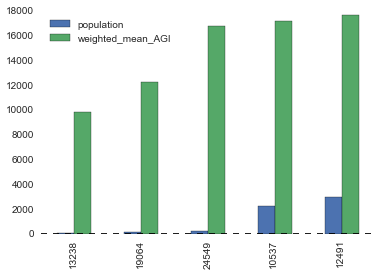

In [88]:
AGI_final.sort('weighted_mean_AGI').head().plot(kind='bar')

# References



<style>
div.text_cell_render {
font-family: "Times New Roman", serif;
...
}
</style>

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) written by Wes McKinney, creator of pandas

The inimitable Julia Evans' [pandas cookbook](https://github.com/jvns/pandas-cookbook)

[Cyrille Rossant](http://ipython-books.github.io/)'s books on IPython

[Interesting notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)